# Astronomy 8824 - Numerical and Statistical Methods in Astrophysics

## Statistical Methods Topic II. Bayesian Parameter Estimation

These notes are for the course Astronomy 8824: Numerical and Statistical Methods in Astrophysics. It is based on notes from David Weinberg with modifications and additions by Paul Martini.
David's original notes are available from his website: http://www.astronomy.ohio-state.edu/~dhw/A8824/index.html

#### Background reading: 
- Statistics, Data Mining, and Machine Learning in Astronomy, Chapter 5

In [1]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize

# matplotlib settings 
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

LaTex macros hidden here -- 
$\newcommand{\expect}[1]{{\left\langle #1 \right\rangle}}$
$\newcommand{\intinf}{\int_{-\infty}^{\infty}}$
$\newcommand{\xbar}{\overline{x}}$
$\newcommand{\ybar}{\overline{y}}$
$\newcommand{\like}{{\cal L}}$
$\newcommand{\llike}{{\rm ln}{\cal L}}$
$\newcommand{\xhat}{\hat{x}}$
$\newcommand{\yhat}{\hat{y}}$
$\newcommand{\xhati}{\hat{x}_i}$
$\newcommand{\yhati}{\hat{y}_i}$
$\newcommand{\sigxi}{\sigma_{x,i}}$
$\newcommand{\sigyi}{\sigma_{y,i}}$


### Bayesian Parameter Estimation 

In Bayesian parameter estimation, one has a model that is assumed to describe the data, and the task is to determine its parameters.

The hypothesis is that the "true value of parameter is $\theta_{\rm true}=\theta$" (discrete) or the "true value of parameter is $\theta \leq \theta_{\rm true} \leq \theta+d\theta$" (continuous). The parameter(s) indicated by $\theta$ are the hypothesis. 

$$
p(\theta|DI) = p(\theta|I) {p(D|\theta I) \over p(D|I)}.
$$

If $\theta$ is continuous, then technically the posterior $p(\theta|DI)$ and the prior $p(\theta|I)$ are multiplied by $d\theta$.  

A Bayesian searches for the parameter value with **maximum posterior probability** $p(\theta|DI)$.

If $p(\theta|I)$ is flat (a "flat prior"), then this is also the value with **maximum likelihood** $p(D|\theta I)$.

Maximum likelihood estimators play a major role in both Bayesian and classical approaches.

### A simple example: mean of data

The parameter (denoted $\theta$ above) we want to measure is the mean $\mu$. We will determine this from some data $D$, which in this case is $N$ measurements $x_i$. The dispersion $\sigma$ is known, and $x_i$ are Gaussian distributed and independent. (Following Loredo, $\S 5.2.2$; see also Ivezic et al. $\S 5.6.1$)

Assume a flat prior: $p(\mu|I) = (\mu_{\rm max}-\mu_{\rm min})^{-1}$. A flat prior is sometimes also called the "least informative prior." It effectively says that based on prior information, the parameter could be anywhere on the interval with equal probability.

The likelihood (term in numerator) is: 
$$\eqalign{
p(\{x_i\}|\mu I) &= 
\prod_i (2\pi \sigma^2)^{-1/2} \exp\left[-{(x_i-\mu)^2 \over 2\sigma^2}\right]
  \cr
                 &=
(2\pi \sigma^2)^{-N/2} \exp\left[-{1\over 2\sigma^2}\sum_i (x_i-\mu)^2\right]\cr
                 &= 
(2\pi \sigma^2)^{-N/2} \exp\left[-{Ns^2 \over 2\sigma^2}\right] 
         \exp\left[-{N\over 2\sigma^2}(\xbar-\mu)^2\right],
}
$$
where $\xbar = {1\over N} \sum x_i$ is sample mean and $s^2 = {1\over N}\sum (x_i-\xbar)^2$ is sample variance. Note that this is not a properly normalized pdf, and in particularly it can be very small for large $N$. It may be useful to think of it as a function of the data.

The global likelihood (term in denominator) is: 
$$ 
p(\{x_i\}|I) = \int_{\mu_{\rm min}}^{\mu_{\rm max}} p(\{x_i\}|\mu I) d\mu
$$

The final result is
$$
  p(\mu|\{x_i\} I) d\mu = K \left({N \over 2\pi \sigma^2}\right)^{1/2}
  \exp\left[-{N \over 2\sigma^2} (\xbar-\mu)^2\right], \quad
  \mu_{\rm min} \leq \mu \leq \mu_{\rm max},
$$
a Gaussian with mean $\xbar$ and dispersion $\sigma/\sqrt{N}$, truncated at $\mu_{\rm min}$ and $\mu_{\rm max}$,
with $K$ a normalization constant such that the probability integrates to one.

The logarithm of the posterior pdf is:
$$
L_p = \ln p(\mu|\{x_i\} I) = \mathrm{constant} - \sum^N_{i=1} \frac{(x_i - \mu)^2}{2 \sigma_i^2} 
$$
The maximum likelihood will be at $(dLp/d\mu)_{\mu=\mu_0}= 0$. When we solve for this we find:
$$
0 = 2\mu_0 \sum^N_{i=1} \frac{x_i - \mu}{2 \sigma_i^2} = \mu_0 \sum \frac{x_i}{\sigma_i^2} - \mu_0^2 \sum \frac{1}{\sigma_i}
$$
$$
\mu_0 \sum \frac{x_i}{\sigma_i^2} = \sum \frac{1}{\sigma_i}
$$
or 
$$
\mu_0 = \frac{ \sum \frac{x_i}{\sigma_i^2} }{\sum \frac{1}{\sigma_i^2} }
$$
This shows that $\mu_0$ is just the weighted, arithmetic mean of the measurements. 

### Some comments on priors

In the above example, as long as the prior range is big compared to $\sigma/\sqrt{N}$, the prior doesn't matter. 

Otherwise it does, by truncation and normalization $K>1$.

If new measurements come in, they can be incorporated by taking the output of this result as a _prior_ for new analysis.

At least at an informal level, this is often done, e.g., $H_0$ priors on CMB analyses.


To have the posterior probability $p(\theta|DI) \propto p(D|\theta I)$ (the likelihood), we need the prior $p(\theta|I)$ to be flat in the range allowed by the data, not universally.  

For example, we may know that $\mu > 0$ on physical grounds. If $\bar{x} \gg \sigma/\sqrt{N}$ (the sample mean is large compared to the uncertainty in the mean), then $p(\mu|I)$ is approximately flat in the allowable range if it is "broad" compared to $\sigma/\sqrt{N}$.  But if $\bar{x} \sim \sigma/\sqrt{N}$, then a flat prior cannot be a good approximation.

For a positive-definite parameter where we have essentially no prior knowledge about its value, a common choice of prior is $p(\theta|I) \propto 1/\theta$, i.e., flat in $\ln\theta$
instead of $\theta$ itself.


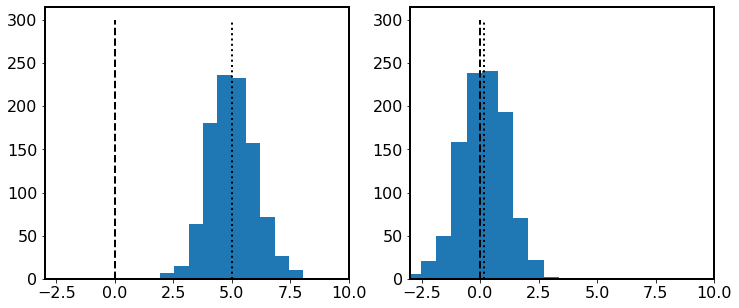

In [2]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 5))
sig = 1
x = np.random.normal(5, sig, 1000)
sig_x = sig*np.ones(len(x))
sig2 = np.power(sig_x, 2)
# weighted mean
meanx = np.sum(x/sig2)/np.sum(1/sig2)
axarr[0].hist(x)
axarr[0].set_xlim(-3, 10)
axarr[0].plot([0, 0], [0, 300], 'k--')
axarr[0].plot([meanx, meanx], [0, 300], 'k:')

y = np.random.normal(0.2, 1, 1000)
# weighted mean
meany = np.sum(y/sig2)/np.sum(1/sig2)
axarr[1].hist(y)
axarr[1].set_xlim(-3, 10)
axarr[1].plot([0, 0], [0, 300], 'k--')
axarr[1].plot([meany, meany], [0, 300], 'k:')

# Note that in the plot on the right, the uncertainty on the mean is such that plausible values of the mean
# would conflict with a positive-definite prior

### Maximum Posterior vs. Maximum Likelihood

From a Bayesian point of view, the end result of a parameter estimation calculation _is_ the posterior probability distribution $p(\theta | DI)$.  Recall that
$$
p(\theta|DI) = p(\theta|I) {p(D|\theta I) \over p(D|I)}.
$$

For a flat prior $p(\theta|I)$, the posterior is proportional to the likelihood $P(D|\theta I)$.

Frequentist parameter estimation methods often focus on maximum likelihood estimators, so there is much in common
between frequentist and Bayesian approaches.  Parameter estimates based on $p(\theta |DI)$ or $p(D|\theta I)$ will
be similar if $p(\theta | I)$ is flat in the region of parameter space allowed by the data.

If you give an expression for, table of, or plot of the likelihood function, then you have presented all of the evidence of the data, and others can apply prior probabilities or frequentist assessments
as they wish.  Thus, if statistics are important to your answer, there is much to be said for presenting things this way if you can.

### A maximum likelihood example: weighted mean

Suppose that we are estimating the mean from $N$ data points that have different errors ("heteroscedastic" data):

The likelihood is 
$$
p(\{x_i\}|\mu I) = 
\prod_i (2\pi \sigma_i^2)^{-1/2} 
\exp\left[-{(x_i-\mu)^2 \over 2\sigma_i^2}\right]~.
$$

Now take the log and set $d\ln L(\mu)/d\mu = 0$.  

A few-line derivation shows that the maximum likelihood estimator is
$$
\hat{\mu}_w = {1 \over \sum_i 1/\sigma_i^2}\sum_i {x_i \over \sigma_i^2}~.
$$

The contribution of each data point is weighted by its inverse variance.

The variance of this estimator is
$$
{\rm Var}(\hat{\mu}_w) = {1 \over \sum_i 1/\sigma_i^2}~.
$$


### Maximum likelihood vs. maximum posterior example: mean of Poisson data

(From Bailer-Jones, _Practical Bayesian Inference_, $\S 4.4.5$)

Recall that a Poisson distribution describes the probability of observing $k$ events in some interval, given some expected average number $\lambda$: 
$$
P(k) = \frac{\lambda^k \mathrm{e}^{-\lambda}}{k!}
$$

Suppose we have $N$ datapoints ${y_i}$ drawn from a Poisson distribution with unknown $\lambda$. For example, we might have a few X-ray photons detected from an astronomical source, and we want to estimate its flux.

We have (for some reason) a prior $P(\lambda) = \exp(-\lambda/a)$ where $a$ is known. 

First we will compute the Maximum Likelihood: 
$$
L(\lambda) = 
\prod_i {e^{-\lambda} \lambda^{y_i} \over y_i!}~.
$$
Thus
$$
\ln L(\lambda) = \sum_i [y_i\ln\lambda - \lambda - \ln(y_i!)] ~.
$$

Setting $d\ln L(\mu)/d\lambda = 0$ gives

$$
\sum_i \left({y_i \over \lambda}-1\right) = 0 
\quad \Longrightarrow \quad
\lambda = {1 \over N} \sum_i y_i.
$$
The maximum likelihood estimate is simply the mean of the data.

Now we will compute the maximum posterior estimate. To do this we maximize: 
$$
\ln P(\lambda | \{y_i\}) = \ln L(\lambda) + \ln P(\lambda) + {\rm const}
$$
$$
\frac{d}{d\lambda} \left[ \sum y_i \ln \lambda - \lambda - \ln y! + \ln P(\lambda) + {\rm const} \right] = 0
$$
with the normalized prior
$$
P(\lambda) = {1 \over a} e^{-\lambda/a} \quad \Longrightarrow \quad
{d \ln P(\lambda) \over d\lambda} = -{1\over a}~.
$$

Differentiating and setting to zero gives
$$
\sum_i \left({y_i \over \lambda}-1\right) - {1 \over a} = 0 
\quad \Longrightarrow \quad
\lambda = {1 \over N+1/a} \sum_i y_i.
$$

The prior causes the maximum posterior estimate to yield a smaller $\lambda$ relative to the maximum likelihood estimate.

As the number of data points increases, the influence of the prior decreases because $1/a$ must become smaller relative to $N$.

In the limit $a \rightarrow \infty$ the prior is flat and the solution goes to the maximum likelihood solution.

### Confidence intervals

We often _summarize_ the results of a calculation with an estimate and a confidence interval.   Bayesians seem to prefer the term "credible region" to "confidence interval," but they appear to be nearly interchangeable, although they are based on different concepts of probability.

Typically, one would quote the maximum likelihood (or maximum posterior probability) value as the estimate, though if the likelihood function is far from Gaussian, people sometimes quote the likelihood weighted mean.

The confidence interval is a region of highest likelihood (or posterior probability) and is characterized by the fraction of the probability that it contains.


For a 1-dimensional problem (1 parameter), this is usually straightforward, though even here a complicated likelihood function may have multiple maxima.

For a Gaussian likelihood function,
$$
\llike = \llike_{\rm max} - {1\over 2}\Delta\chi^2,
\qquad
\like = \like_{\rm max} e^{-\Delta\chi^2/2}.
$$

(We will delve further into $\chi^2$ and $\Delta \chi^2$ in the next classes, but for now you can regard $\Delta \chi^2$ as a measure of the deviation of $p(D|\theta I)$ from its maximum value.)

The regions $\Delta\chi^2 \leq 1$, $\Delta\chi^2 \leq 4$, and $\Delta\chi^2 \leq 9$ contain 68.3\%, 95.4\%, and 99.73\% of the probability.  Since a Gaussian is $(2\pi\sigma^2)^{-1/2} e^{-x^2/2\sigma^2}$, these values of $\Delta\chi^2$ correspond to $1\sigma$, $2\sigma$, and $3\sigma$ deviations.

For a non-Gaussian likelihood function, it can be useful instead to quote the values where $\like$ falls to some fraction of its maximum value, say 0.1, in which case the parameter value is 10 times less probable than its most probable value. This particular fraction corresponds in the Gaussian case to $2.14\sigma$, since $e^{-2.14^2/2}=0.1$.


If there are multiple parameters, errors on different parameters may be correlated.

Confidence intervals are defined by contours in a multi-dimensional parameter space.

If the likelihood function is a multi-variate Gaussian, then the confidence contours are ellipses, with the direction of the ellipse axes depending on the covariance of the errors in the parameters.

For the 2-d case, the contours $\Delta\chi^2 = 2.30,$ 6.17, and 11.80 enclose 68.3\%, 95.4\%, and 99.73\% of the probability. ($\Delta\chi^2 = 0.21$ contains 99\%.) See the _Numerical Recipes_ chapter on "Modeling of Data" for higher dimensions and more discussion.

These are sometimes referred to as "$1\sigma$", "$2\sigma$", and "$3\sigma$" regions, when there are multiple dimensions this usage is loose at best and can be misleading.

In some cases, a sensible choice of parameters will eliminate or minimize covariance, making results easier to interpret. An obvious case is the slope and intercept of a linear fit. These are usually highly correlated, but the covariance can be eliminated by defining the intercept at an appropriate "pivot point," fitting $y=a(x-x_p)+b$ instead of $y=ax+b$.

Covariance Matrix for left panel 
[[ 0.01498144 -0.11236078]
 [-0.11236078  0.87720259]]
Note the significant covariance between x and y 

Covariance Matrix for right panel 
[[ 1.49814375e-02 -2.76134662e-17]
 [-2.76134662e-17  3.44967312e-02]]
There is no longer any covariance


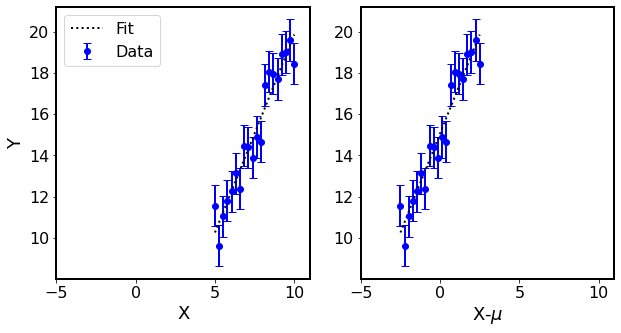

In [3]:
# Line with N observed values
np.random.seed(1216)
Npts = 20
x = np.linspace(5, 10, Npts)
m = 2
b = 0
y = m*x + b   # True values y_i
# Determine a unique sigma for each point
sig_y = np.random.normal(0., 1., Npts)
# Scatter each point based on that standard deviation

yhat = y + sig_y   # Observed values yhat_i
p = np.polyfit(x, yhat, 1, cov=True)
fig, axarr = plt.subplots(1, 2, figsize=(10,5))
axarr[0].errorbar(x, yhat, yerr=np.ones(len(x)), fmt='bo', capsize=4, label="Data")
axarr[0].plot(x, p[0][0]*x + p[0][1], 'k:', label="Fit")
axarr[0].set_ylabel("Y")
axarr[0].set_xlabel("X")
axarr[0].set_xlim(-5, 11)
axarr[0].legend(loc='upper left')

print("Covariance Matrix for left panel ")
print(p[1])
print("Note the significant covariance between x and y ")
print("")

yhat = y + sig_y   # Observed values yhat_i
mu = np.mean(x)
p = np.polyfit(x-mu, yhat, 1, cov=True)
axarr[1].errorbar(x-mu, yhat, yerr=np.ones(len(x)), fmt='bo', capsize=4, label="Data")
axarr[1].plot(x-mu, p[0][0]*(x-mu) + p[0][1], 'k:', label="Fit")
axarr[1].set_xlim(-5, 11)
axarr[1].set_xlabel(r"X-$\mu$")

print("Covariance Matrix for right panel ")
print(p[1])
print("There is no longer any covariance")

### Marginalization

Suppose that we are simultaneously fitting multiple parameters $\theta_i$ but that we would like to know the confidence interval for one of them in particular, e.g., $\theta_1$.

One of the strengths of Bayesian statistics is that it offers a clear way of doing this:
$$
p(\theta_1|DI) = \int p(\{\theta_i\}|DI) d\theta_2 d\theta_3 ...d\theta_n.
$$

This procedure of integrating over "nuisance parameters" is called "marginalization."  (The above expression is the marginal pdf of $\theta_1$.)

_The approach doesn't make sense in the frequentist framework because one cannot talk about the
probability of a parameter value._

**Example:** Suppose we have data that we are using to estimate the slope $a$, intercept $b$, and intrinsic scatter $\sigma$ of a linear relation between $x$ and $y$.

If we just want to know the posterior distribution for the slope, we can find it from
$$
p(a|DI) = \intinf db \int_0^\infty d\sigma p(ab\sigma|DI).
$$

We don't have to go down to a single dimension, e.g., if we don't care about the dispersion $\sigma$ but would like to know the joint distribution of $a$ and $b$:
$$
p(ab|DI) = \int_0^\infty d\sigma p(ab\sigma|DI)d\sigma.
$$

Marginalization plays a crucial role in, for example, cosmological analyses of CMB and large scale structure data,
where the cosmological model being fit typically has 6-10 free parameters but we are often interested in learning
about constraints on specific ones, such as $H_0$ or the effective number of neutrino species.  

Systematic uncertainties in the measurements can often be treated by introducing a nuisance parameter that describes
them, such as a calibration offset, imposing some prior, and then marginalizing over these nuisance parameters
when fitting for other parameters of physical interest.

Of course, sometimes one astronomer's nuisance is another astronomer's science, and vice versa.


### Straight line fitting: the "standard" case

Determine maximum likelihood values of $a$ and $b$ in a linear fit $y=ax + b$, given data points with known errors on $y$, assuming Gaussian error distribution:

$$
p(\yhat_i | y_i) = (2\pi\sigma^2_{y,i})^{-1/2} 
  \exp\left[-(\yhat_i-y_i)^2 \over 2\sigma^2_{y,i}\right],
$$
where $y_i$ is the true value, $\sigma_{y, i}$ is the error on $y_i$, and $\yhati$ is the observed value.

Likelihood
$$\eqalign{
\like &= p(\{\yhat_i\}|a,b) = \prod_i p(\yhat_i | ax_i + b) \cr
 &=
 \prod_i (2\pi\sigyi^2)^{-1/2} \exp\left[-
   {(\yhat_i-ax_i-b)^2 \over 2\sigyi^2}\right].
}
$$

It is often convenient to work with the logarithm of the likelihood
$$
\llike = -{1\over 2} \sum {(\yhat_i-ax_i-b)^2 \over 2\sigyi^2} + C,
$$
where $C$ depends on the (known) errors $\sigyi$ but is independent of $a$ and $b$. (In this case C has the term $(2 \pi \sigma^2_{y,i})^{-1/2}$).

The maximum likelihood solution is thus the solution with minimum
$$
\chi^2 = \sum {(\yhat_i-ax_i-b)^2 \over \sigyi^2},
$$
and $\llike = -\chi^2/2 + C$. Note that maximizing the likelihood is the same as minimizing $\chi^2$ **if** the errors are Gaussian.

For this problem, one can find standard analytic expressions (e.g., Numerical Recipes $\S 15.2$) for $a$ and $b$ in terms of the data and error bars by solving the equations that define the maximum of the likelihood function,
$$
{\partial \llike \over \partial a} = 0, \qquad
{\partial \llike \over \partial b} = 0.
$$

For the case of equal and independent errors on each data point, the results can be written:
$$
\hat{a}  = {\bar{xy}-\bar{x}\bar{y} \over \bar{x^2}-\bar{x}^2} 
$$
and
$$
\hat{b} = \bar{y}-\hat{a}\bar{x}.
$$
We will get formulas for the general case (more general than given in NR) when we discuss general linear models.

### Straight line fitting: a non-standard but very useful case

Now consider a more complicated variation of this problem: fit $\ybar=ax+b$, with measurement errors in $x$ and $y$ _and_ intrinsic scatter in the relation between $y$ and $x$.

A model with intrinsic scatter (here assumed constant from point to point and denoted $\sigma$) is usually more realistic than the commonly adopted, perfect correlation model.

*If* all of the scatters are Gaussian distributed, we have the following probability distributions for the true values, and the observed values of both x and y. There is a distribution for the true values due to the intrinsic scatter, and there are distributions for both $\xhati$ and $\yhati$ due to measurement errors.

$$\eqalign{
p(y_i | x_i) &= (2\pi\sigma^2)^{-1/2} 
  \exp\left[-(y_i-ax_i-b)^2 \over 2\sigma^2\right] \cr
p(\yhat_i | y_i) &= (2\pi\sigma^2_{y,i})^{-1/2} 
  \exp\left[-(\yhat_i-y_i)^2 \over 2\sigma^2_{y,i}\right] \cr
p(\xhat_i | x_i) &= (2\pi\sigma^2_{x,i})^{-1/2} 
  \exp\left[-(\xhat_i-x_i)^2 \over 2\sigma^2_{x,i}\right].
}
$$
In this case we want to maximize
$$
\like = \prod_i p(\yhati|\xhati) \qquad \Longrightarrow \qquad
\llike = \sum_i \ln p(\yhati|\xhati).
$$

So we need the expression for $p(\yhati|\xhati)$. This is an expression for the observed $\yhati$ given the observed $\xhati$. 

$$\eqalign{
p(\yhati|\xhati) &= \intinf dy_i \,p(\yhati|y_i)\, p(y_i|\xhati) \cr
 &= \intinf dy_i\, p(\yhati|y_i) \intinf dx_i\, p(y_i|x_i)\, p(x_i|\xhati). \cr
}
$$
$p(x_i|\xhati)$ is the probability of the real $x_i$ given the observed $\xhati$. 

Now assume a flat prior on $x_i$, $p(x_i)=$const., so that $p(x_i|\xhati) = p(\xhati|x_i)$ (by Bayes' theorem and the requirement that probabilities integrate to one). This assumption is non-trivial, but usually OK because we only require flatness over the range allowed by $\xhati$.


We can now substitute our expressions for the probabilities, and several pages of algebra and integrals lead eventually to the expression
$$
p(\yhat_i | \xhati) = (2\pi)^{-1/2} (\sigma^2 + \sigyi^2 + a^2\sigxi^2)^{-1/2}
  \exp\left[-{(\yhati-a\xhati-b)^2 \over 2(\sigma^2+\sigyi^2+a^2\sigxi^2)}
  \right].
$$

This expression looks eminently sensible.  For $\sigxi=0$, we get a Gaussian whose width is the quadrature sum of the intrinsic and observationalscatter in $y$.  Non-zero $\sigxi$ increases the probability of larger
deviation between observed and predicted $y_i$ by allowing the true value of $ax_i+b$ to be closer to $\yhati$ 
than $a\xhat_i+b$.  

A deviation $\Delta y_i/\sigyi$ has similar weight to a deviation $a\Delta x_i/\sigxi$.
If you think of $x$ and $y$ as having different units, then it is obvious that a factor of $a$ is needed to give $\sigyi$ and $a\sigxi$ the same dimensions.



The maximum likelihood solution requires maximizing
$$\eqalign{
\sum_i \ln p(\yhati|\xhati) = &
  -{1\over 2} \sum_i \ln(\sigma^2 + \sigyi^2 + a^2\sigxi^2) \cr
  & - \sum_i {(\yhati-a\xhati-b)^2 \over 2(\sigma^2 + \sigyi^2 + a^2\sigxi^2)}
  + {\rm constant},
}
$$
 and thus solving the equations
$$
{\partial \llike \over \partial a} = 0, \qquad
{\partial \llike \over \partial b} = 0, \qquad
{\partial \llike \over \partial \sigma} = 0.
$$

There is a straightforward algebraic solution for $b$,
$$
b = {-\sum_i (a\xhati - \yhati) W_i \over \sum_i W_i},
$$
where the weights are
$$
W_i = {1 \over 2(\sigma^2 + \sigyi^2 + a^2\sigxi^2)}~.
$$
This is just an inverse-variance weighted average of the individual estimates of $b$.

I couldn't find algebraic solutions for $a$ and $\sigma$, but it is straightforward to search a grid of $(a,\sigma)$, finding the best $b$ for each $(a,\sigma)$ from the above equation and evaluating
the overall likelihood.

There are a couple of points worth noting about the likelihood expression.

First, you might naively have thought that with intrinsic scatter as a free parameter, the maximum likelihood solution would be to have a very large intrinsic scatter, since then each deviation would contribute very little to $\chi^2$.  

However, while the second term in the likelihood always rewards large $\sigma^2$, the first term penalizes it, basically because the prediction $ax+b$ is diluted by being spread over a large range, so it doesn't get much "credit" when it is close.

If a significant fraction of points have deviations that put them on the exponential tail of the Gaussian, then raising $\sigma$ will increase the likelihood, but once the typical deviation falls to $\sim 1\sigma$, raising $\sigma$ will decrease the likelihood.

This is, of course, what ought to happen.  If the prediction is a scatterplot (as happens in the limit of large intrinsic scatter), then it is unlikely to actually have the points lie close to a line.


Second, if we reverse the roles of $y$ and $x$, letting the intrinsic scatter be on $x$ rather than $y$, then the solution for $a$ and $b$ (especially $a$) will be different.  

Intrinsic scatter on $y$ is a _different_ hypothesis from intrinsic scatter on $x$, and the corresponding best
fit slopes and intercepts are different.

The difference goes away if $\sigma$ is small compared to the observational errors.

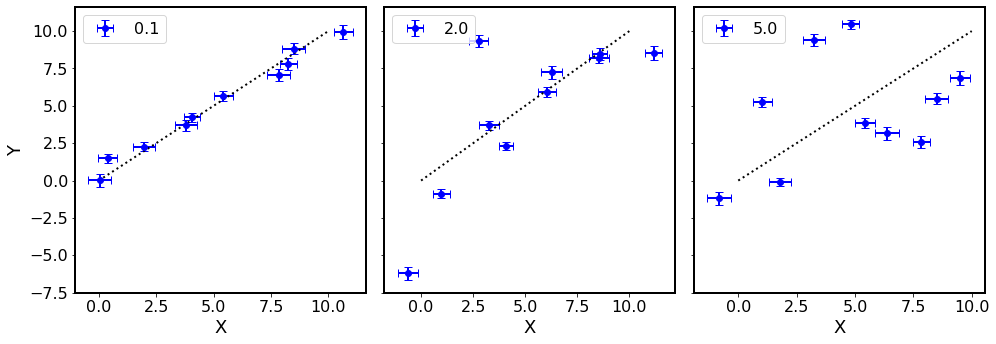

In [4]:
### Example of increasing intrinsic scatter

np.random.seed(1216)
Npts = 10
x_i = np.linspace(0, 10, Npts)
a = 1.
b = 0.
sig_int = 1.
y_i = a*x_i + b   # True values y_i
sig_x = 0.5
sig_y = sig_x

# Heteroscedastic errors
sig_x_i = np.random.uniform(0.5*sig_x, sig_x, Npts)
sig_y_i = np.random.uniform(0.5*sig_y, sig_y, Npts) 

# Homoscedastic errors
# sig_x_i = 0.5*np.ones(Npts) # np.random.uniform(0.25, 0.5, Npts)
# sig_y_i = 0.5*np.ones(Npts) # np.random.uniform(0.25, 0.5, Npts) 


def getline(x_i, y_i, sig_x_i, sig_y_i, sig):
    xhat_i = x_i.copy()
    yhat_i = y_i.copy()
    # Apply the scatter to x and y
    for i in range(Npts):
        # apply the error to each point, and add intrinsic scatter to yhat_i
        err_y = np.random.normal(0, sig_y_i[i])
        xhat_i[i] += np.random.normal(0, sig_x_i[i])
        yhat_i[i] += np.random.normal(0, np.sqrt(err_y*err_y + sig*sig) )

    return xhat_i, yhat_i

sig_int = 0.1
lab = "{:.1f}".format(sig_int)
xhat_i, yhat_i = getline(x_i, y_i, sig_x_i, sig_y_i, sig=sig_int)
fig, axarr = plt.subplots(1, 3, figsize=(14,5), sharey=True)
axarr[0].errorbar(xhat_i, yhat_i, xerr=sig_x_i, yerr=sig_y_i, fmt='bo', capsize=4, label=lab) #".format(sig))
axarr[0].plot(x_i, y_i, 'k:')
axarr[0].set_ylabel("Y")
axarr[0].set_xlabel("X")
axarr[0].legend(loc='upper left')

sig_int = 2
lab = "{:.1f}".format(sig_int)
xhat_i, yhat_i = getline(x_i, y_i, sig_x_i, sig_y_i, sig=sig_int)
axarr[1].errorbar(xhat_i, yhat_i, xerr=sig_x_i, yerr=sig_y_i, fmt='bo', capsize=4, label=lab)
axarr[1].plot(x_i, y_i, 'k:')
axarr[1].set_xlabel("X")
axarr[1].legend(loc='upper left')

sig_int = 5
lab = "{:.1f}".format(sig_int)
xhat_i, yhat_i = getline(x_i, y_i, sig_x_i, sig_y_i, sig=sig_int)
axarr[2].errorbar(xhat_i, yhat_i, xerr=sig_x_i, yerr=sig_y_i, fmt='bo', capsize=4, label=lab)
axarr[2].plot(x_i, y_i, 'k:')
axarr[2].set_xlabel("X")
axarr[2].legend(loc='upper left')

plt.tight_layout()

In [10]:
### Example of fitting a line to data with heteroscedastic errors and intrinsic scatter

np.random.seed(1216)
Npts = 100
x_i = np.linspace(0, 10, Npts)
a = 1.
b = 2.
sig_int = 1.0
y_i = a*x_i + b   # True values y_i
sig_x = 0.5
sig_y = sig_x

# Heteroscedastic errors
sig_x_i = np.random.uniform(0.5*sig_x, sig_x, Npts)
sig_y_i = np.random.uniform(0.5*sig_y, sig_y, Npts) 

# Homoscedastic errors
# sig_x_i = 0.5*np.ones(Npts) # np.random.uniform(0.25, 0.5, Npts)
# sig_y_i = 0.5*np.ones(Npts) # np.random.uniform(0.25, 0.5, Npts) 

lab = "{:.1f}".format(sig_int)
xhat_i, yhat_i = getline(x_i, y_i, sig_x_i, sig_y_i, sig=sig_int)

def lnprob(theta, xhat_i, yhat_i, sig_x_i, sig_y_i):
    '''
    observations: xhat_i, yhat_i
    uncertainties: sig_x_i, sig_y_i
    model parameters:
       am * x + bm with intrinsic scatter sigma
    '''
    am, bm, sigm = theta
    lprob = -0.5*np.log(sigm*sigm + sig_y_i*sig_y_i + am*am*sig_x_i*sig_x_i) - \
        0.5*np.power( yhat_i - am*xhat_i - bm, 2)/(sigm*sigm + sig_y_i*sig_y_i + am*am*sig_x_i*sig_x_i)
    
    return np.sum(lprob)

func = lambda *args: -lnprob(*args)
x0 = np.array([a, b, sig_int]) + np.random.randn(3)
print("Starting guess ", x0)
# BFGS is the Broyden, Fletcher, Goldfarb, and Shanno algorithm. It is a second-order method. 
# It approximates the second derivative (Hessian)
result = minimize(func, x0, args=(xhat_i, yhat_i, sig_x_i, sig_y_i), method="BFGS")
errs = np.sqrt(np.diag(result.hess_inv)) # The inverse of the Hessian matrix is the covariance matrix
print("Result for slope, intercept, and intrinsic scatter: ", result.x)
print("Uncertainties on the result: {0:.2f} {1:.2f} {2:.2f}".format(errs[0], errs[1], errs[2]))
print("Input values: ", a, b, sig_int)

Starting guess  [2.07057259 2.47594789 2.68054222]
Result for slope, intercept, and intrinsic scatter:  [0.9770739  2.21260296 1.10361306]
Uncertainties on the result: 0.04 0.24 0.10
Input values:  1.0 2.0 1.0


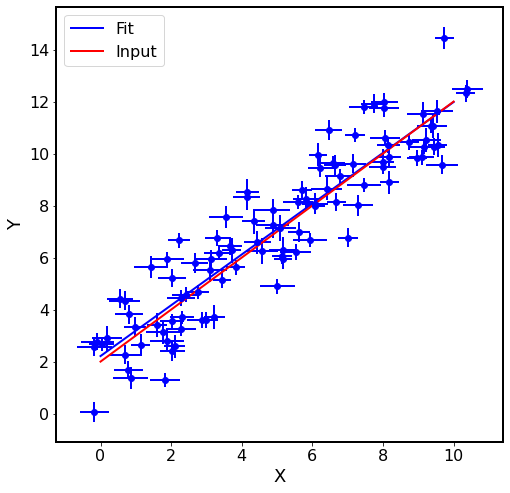

In [11]:
# Plot the result and compare to the input
plt.figure(figsize=(8, 8))
plt.errorbar(xhat_i, yhat_i, xerr=sig_x_i, yerr=sig_y_i, fmt='bo')
ydraw = result.x[0]*x_i + result.x[1]
plt.plot(x_i, ydraw, 'b', label="Fit")
plt.plot(x_i, y_i, 'r', label="Input")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

In [12]:
result

      fun: 70.04707388203227
 hess_inv: array([[ 0.00167968, -0.00835208, -0.00027304],
       [-0.00835208,  0.05619107,  0.00141717],
       [-0.00027304,  0.00141717,  0.00939447]])
      jac: array([ 0.00000000e+00, -1.90734863e-06, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 80
      nit: 15
     njev: 20
   status: 0
  success: True
        x: array([0.9770739 , 2.21260296, 1.10361306])